El método de Euler aplicado a la ecuación
$$v' = (a+2\bar{u})v + (a\bar{u} + \bar{u}^2)$$
la cual resulta de linealizar la ecuación
$$u' = au + u^2$$
resulta estable cuando
$$|1+k(a+2\bar{u})| \leq 1$$

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
N = 1001
x = np.linspace(-3,3,N)
y = np.linspace(-3,3,N)
x,y = np.meshgrid(x,y)
plano = x + y*1j

In [22]:
k = 1     # paso de tiempo
ubar = 0    # valor $\bar{u}$ cercano a la solución $u$
condicion = 1 + k * (plano + 2*ubar)

In [23]:
norma = np.sqrt( condicion.real**2 + condicion.imag**2 ) <= 1

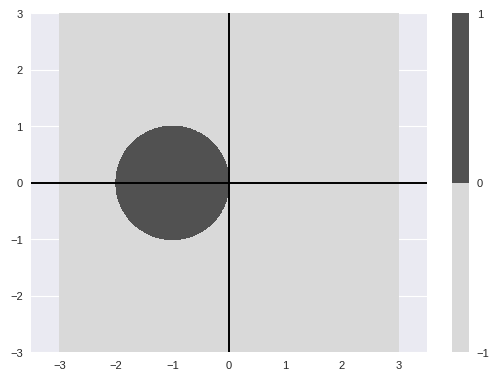

In [24]:
plt.contourf(
    x,
    y,
    norma,
    levels=np.array([-1,0,1]),
    cmap="Greys"
)
plt.axhline(0, color="k")
plt.axvline(0, color="k")
plt.colorbar()
plt.axis("equal")
plt.show()

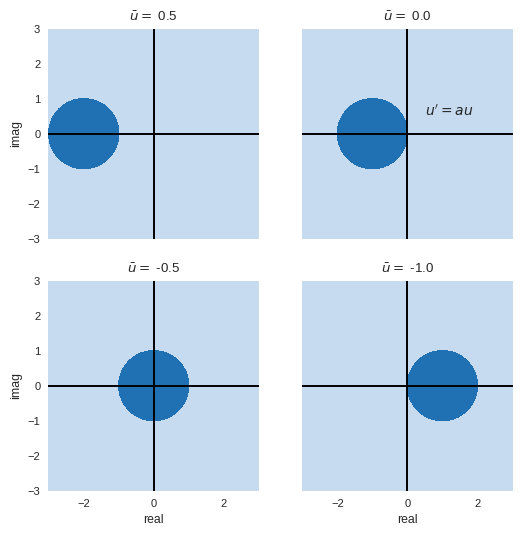

In [25]:
ubars = np.array([0.5,0,-0.5,-1])
fig, axs = plt.subplots(2,2, figsize=(6,6))
for i in range(ubars.shape[0]):
    u = ubars[i]
    condicion = 1 + k * (plano + 2*u)
    norma = np.sqrt( condicion.real**2 + condicion.imag**2 ) <= 1
    ax = axs.flat[i]
    ax.contourf(
        x,
        y,
        norma,
        levels=np.array([-1,0,1]),
        cmap="Blues"
    )
    ax.axhline(0, color="k")
    ax.axvline(0, color="k")
    ax.axis("equal")
    ax.set_title(r"$\bar{u}=$ %1.1f" %u)
    ax.set_xlabel("real")
    ax.set_ylabel("imag")
    if u == 0.0:
        ax.text(0.5,0.5,"$u'=au$")
for ax in axs.flat:
    ax.label_outer()

plt.savefig("figuras/A-Stability-dudt=au+u2-FE.pdf")
plt.show()

# Euler hacia atrás

Aplicando BE al mismo problema resulta que el método es A-Estable cuando
$$|1 - k(a+2\bar{u})| >= 1$$

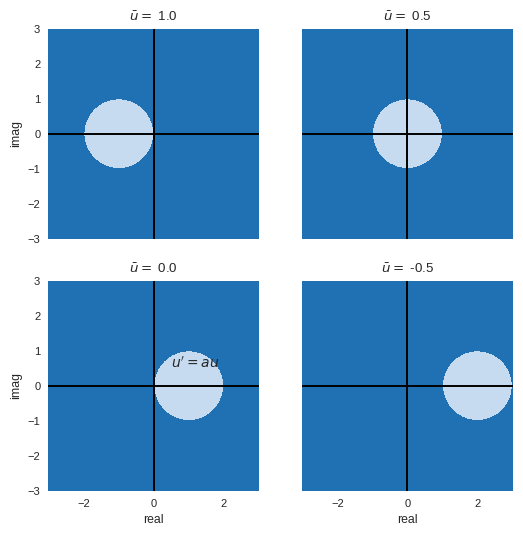

In [26]:
ubars = np.array([1,0.5,0,-0.5])
fig, axs = plt.subplots(2,2, figsize=(6,6))
for i in range(ubars.shape[0]):
    u = ubars[i]
    condicion = 1 - k * (plano + 2*u)
    norma = np.sqrt( condicion.real**2 + condicion.imag**2 ) >= 1
    ax = axs.flat[i]
    ax.contourf(
        x,
        y,
        norma,
        levels=np.array([-1,0,1]),
        cmap="Blues"
    )
    ax.axhline(0, color="k")
    ax.axvline(0, color="k")
    ax.axis("equal")
    ax.set_title(r"$\bar{u}=$ %1.1f" %u)
    ax.set_xlabel("real")
    ax.set_ylabel("imag")
    if u == 0.0:
        ax.text(0.5,0.5,"$u'=au$")
for ax in axs.flat:
    ax.label_outer()

plt.savefig("figuras/A-Stability-dudt=au+u2-BE.pdf")
plt.show()

# Crank-Nicolson

Aplicando el método de CN al mismo problema se obtiene

$$
\left|
    \frac{1+\frac{k}{2}(a+2\bar{u})}{1-\frac{k}{2}(a+2\bar{u})}
\right|
\leq 1
$$
y
$$
\left|
    \frac{1}{1-\frac{k}{2}(a+2\bar{u})}
\right|
\leq 1
$$

In [27]:
N = 1001
x = np.linspace(-5,5,N)
y = np.linspace(-5,5,N)
x,y = np.meshgrid(x,y)
plano = x + y*1j

/tmp/ipykernel_514/744215007.py:7: RuntimeWarning: divide by zero encountered in divide
  condicion1 = numerador1 / denominador1
/tmp/ipykernel_514/744215007.py:7: RuntimeWarning: invalid value encountered in divide
  condicion1 = numerador1 / denominador1
/tmp/ipykernel_514/744215007.py:10: RuntimeWarning: divide by zero encountered in divide
  condicion2 = numerador2 / denominador2
/tmp/ipykernel_514/744215007.py:10: RuntimeWarning: invalid value encountered in divide
  condicion2 = numerador2 / denominador2


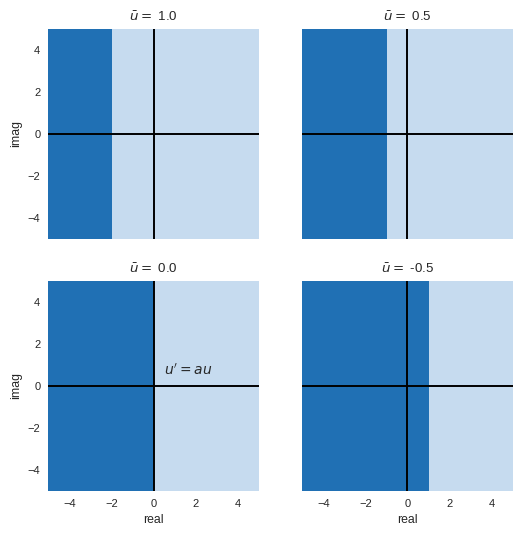

In [28]:
ubars = np.array([1,0.5,0,-0.5])
fig, axs = plt.subplots(2,2, figsize=(6,6))
for i in range(ubars.shape[0]):
    u = ubars[i]
    numerador1 = 1 + 0.5 * k * (plano + 2 * u)
    denominador1 = 1 - 0.5 * k * (plano + 2 * u)
    condicion1 = numerador1 / denominador1
    numerador2 = 1#k * (plano * u + u**2)
    denominador2 = 1 - 0.5* k * (plano + 2*u)
    condicion2 = numerador2 / denominador2
    norma1 = np.sqrt( condicion1.real**2 + condicion1.imag**2 ) <= 1
    norma2 = np.sqrt( condicion2.real**2 + condicion2.imag**2 ) <= 1
    norma = norma1 * norma2
    ax = axs.flat[i]
    ax.contourf(
        x,
        y,
        norma,
        levels=np.array([-1,0,1]),
        cmap="Blues"
    )
    ax.axhline(0, color="k")
    ax.axvline(0, color="k")
    ax.axis("equal")
    ax.set_title(r"$\bar{u}=$ %1.1f" %u)
    ax.set_xlabel("real")
    ax.set_ylabel("imag")
    if u == 0.0:
        ax.text(0.5,0.5,"$u'=au$")
for ax in axs.flat:
    ax.label_outer()

plt.savefig("figuras/A-Stability-dudt=au+u2-CN.pdf")
plt.show()

# Solución analítica

$$u = \frac{1}{e^{-t}-1}$$

In [29]:
plt.style.use(("seaborn-v0_8-darkgrid", "seaborn-v0_8-colorblind", "seaborn-v0_8-paper"))
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.shadow"] = True

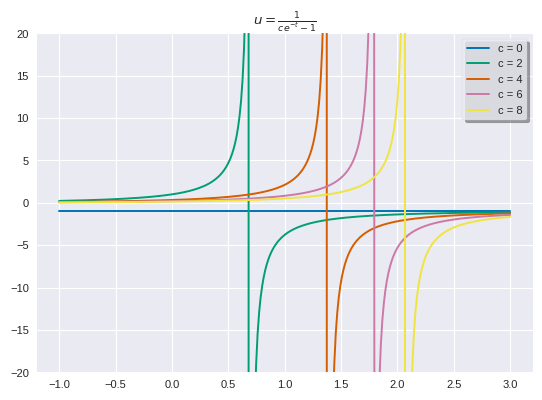

In [30]:
cs = np.arange(0,10,2)
t = np.linspace(-1,3,301)
for c in cs:
    u = 1 / (c*np.exp(-t) - 1)
    plt.plot(t,u, label="c = %d" %c)
plt.ylim((-20,20))
plt.legend()
plt.title("$u=\\frac{1}{ce^{-t}-1}$")
plt.show()

/tmp/ipykernel_514/3641180598.py:4: RuntimeWarning: invalid value encountered in divide
  u = c / (np.exp(-t) - 1)
/tmp/ipykernel_514/3641180598.py:4: RuntimeWarning: divide by zero encountered in divide
  u = c / (np.exp(-t) - 1)


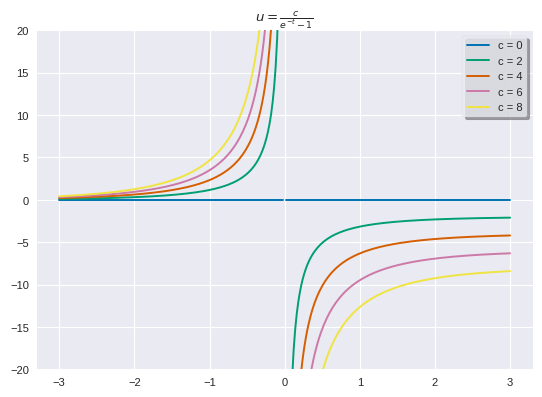

In [31]:
cs = np.arange(0,10,2)
t = np.linspace(-3,3,301)
for c in cs:
    u = c / (np.exp(-t) - 1)
    plt.plot(t,u, label="c = %d" %c)
plt.ylim((-20,20))
plt.legend()
plt.title("$u=\\frac{c}{e^{-t}-1}$")
plt.show()

/tmp/ipykernel_514/1608946700.py:4: RuntimeWarning: divide by zero encountered in divide
  u = 1 / (np.exp(-t) - 1) + c


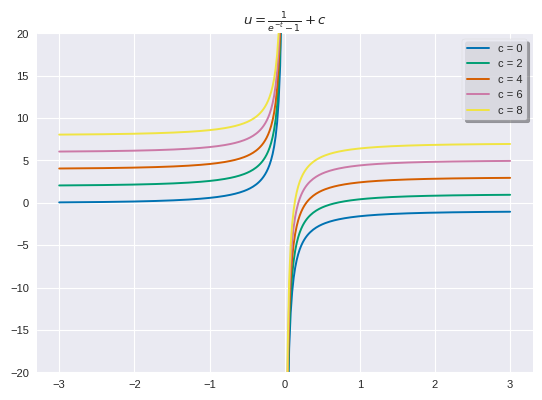

In [32]:
cs = np.arange(0,10,2)
t = np.linspace(-3,3,301)
for c in cs:
    u = 1 / (np.exp(-t) - 1) + c
    plt.plot(t,u, label="c = %d" %c)
plt.ylim((-20,20))
plt.legend()
plt.title("$u=\\frac{1}{e^{-t}-1} + c$")
plt.show()

/tmp/ipykernel_514/4022121309.py:11: RuntimeWarning: divide by zero encountered in divide
  u = 1 / (np.exp(-t) - 1) + c


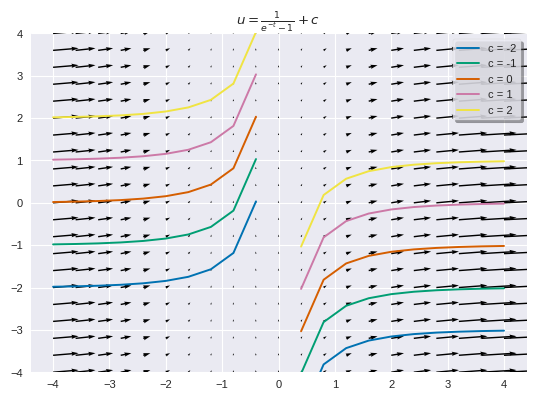

In [33]:
# Visualización como campo vectorial
x = np.linspace(-4,4,21)
t = x.copy()
y = x.copy()
x,y = np.meshgrid(x,y)
u = x + x**2
v = np.ones(u.shape)
plt.quiver(x,y,u,v)
cs = np.arange(-2,3,1)
for c in cs:
    u = 1 / (np.exp(-t) - 1) + c
    plt.plot(t,u, label="c = %d" %c)
plt.ylim((np.min(np.min(x)),np.max(np.max(x))))
plt.legend()
plt.title("$u=\\frac{1}{e^{-t}-1} + c$")
plt.show()

Usando la condición inicial

$$u(0) = 1$$

Se tiene la solución particular

$$u(t) = \frac{1}{2 e^{-t} - 1}$$

(-5.0, 5.0)

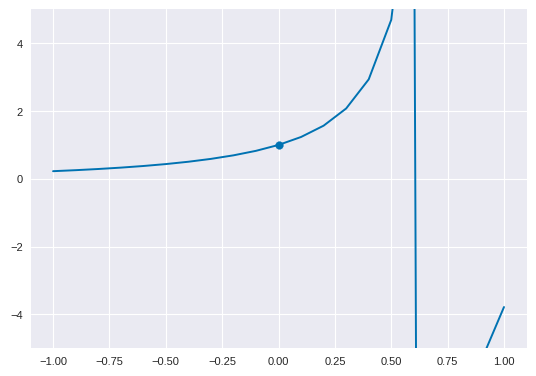

In [34]:
t = np.linspace(-1,1,21)
u = 1 / (2 * np.exp(-t) - 1)

plt.plot(t,u)
plt.scatter(0,1)
plt.ylim((-5,5))

In [35]:
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

/tmp/ipykernel_514/3934775513.py:21: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  ube[n+1] = fsolve(lambda u: u-k*f(u)-ube[n], k*ube[n])[0]
/tmp/ipykernel_514/3934775513.py:26: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  ucn[n+1] = fsolve(lambda u: u - k*f(u) - ucn[n] - k*f(ucn[n]), k*ucn[n])[0]
/tmp/ipykernel_514/3934775513.py:26: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  ucn[n+1] = fsolve(lambda u: u - k*f(u) - ucn[n] - k*f(ucn[n]), k*ucn[n])[0]


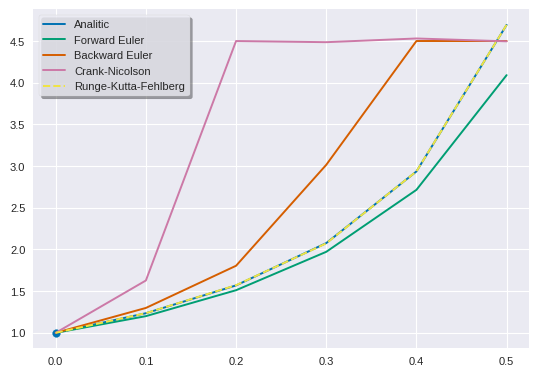

In [36]:
N = 6
T = 0.5
t = np.linspace(0,T,N)
u = 1 / (2 * np.exp(-t) - 1)
# Resolviendo con diferentes métodos numéricos
u0 = np.array([0,1])


tevals = np.linspace(0,T,N)
k = tevals[1] - tevals[0]
f = lambda u: u + u**2 
# Forward Euler
ufe = np.zeros(N)
ufe[0] = u0[1]
for n in range(N-1):
    ufe[n+1] = u[n] + k * f(u[n])
# Backward Euler
ube = np.zeros(N)
ube[0] = u0[1]
for n in range(N-1):
    ube[n+1] = fsolve(lambda u: u-k*f(u)-ube[n], k*ube[n])[0]
# Crank-Nicolson
ucn = np.zeros(N)
ucn[0] = u0[1]
for n in range(N-1):
    ucn[n+1] = fsolve(lambda u: u - k*f(u) - ucn[n] - k*f(ucn[n]), k*ucn[n])[0]
# Runge-Kutta-Fehlberg
fun = lambda t,u: f(u)
sol = solve_ivp(fun, [0,T], u0, t_eval=tevals)
urk = sol.y[1,:]

plt.plot(t,u, label="Analitic")
plt.scatter(u0[0],u0[1])
# plt.ylim((0.5,7))
# FE
plt.plot(tevals, ufe, label="Forward Euler")
# BE
plt.plot(tevals, ube, label="Backward Euler")
# CN
plt.plot(tevals, ucn, label="Crank-Nicolson")
# RKF
plt.plot(sol.t, urk, "--",label="Runge-Kutta-Fehlberg")

plt.savefig("figuras/dudt=u+u2-solution.pdf")
plt.legend()
plt.show()

In [37]:
errores = np.array([
    np.linalg.norm(ufe-u),
    np.linalg.norm(ube-u),
    np.linalg.norm(ucn-u),
    np.linalg.norm(urk-u)
])

In [38]:
import pandas as pd

/tmp/ipykernel_514/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [39]:
df = pd.DataFrame({
    "Métodos": ["Forward Euler", "Backward Euler", "Crank-Nicolson", "Runge-Kutta-Fehlberg"],
    "Errores (norma 2)": errores
})
df

,Métodos,Errores (norma 2)
0,Forward Euler,0.653568
1,Backward Euler,1.851165
2,Crank-Nicolson,4.139787
3,Runge-Kutta-Fehlberg,0.004448
